# Practice Exam #1 Problem 15

### Import Libraries

In [ ]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from random import randint

In [2]:
def img_plt(images, labels):
  plt.figure() 
  for i in range(1, 11):
    plt.subplot(2, 5 ,i)
    plt.imshow(images[i - 1,:,:],cmap = 'gray')
    plt.title('Label: ' + str(labels[i - 1]))
  plt.show()

### Load Data from MNIST set

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('The number of images in training set is', x_train.shape[0])
print('The number of images in testing set is', x_test.shape[0])

The number of images in training set is 60000
The number of images in testing set is 10000


### Select Only Digits '1' and '2' From MNIST Set.

In [4]:
x_train_01 = x_train[np.logical_or(y_train == 1,y_train == 2),:,:] 
y_train_01 = y_train[np.logical_or(y_train == 1,y_train == 2)]
print(y_train_01.shape)

(12700,)


### Print Center 5 by 5 Image Attributes

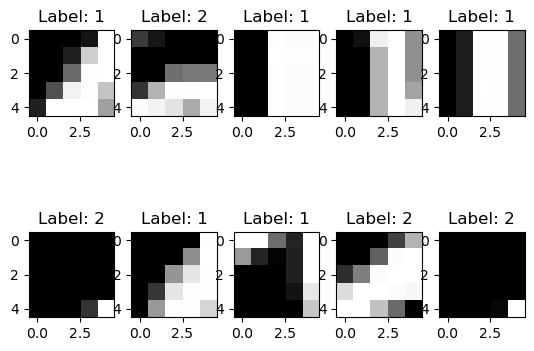

3085
(12700, 5)


In [5]:
img_plt(x_train_01[0:10, 11:16, 11:16], y_train_01[0:10])

print(np.sum(x_train_01[0 ,11:16, 11:16])) 

#calculate the attributes
features = np.sum(x_train_01[:, 11:16, 11:16], axis = 2) / 25
print(features.shape)

### Calculate Average Value of 5 by 5 Image Attribute

In [6]:
avg = np.zeros((x_train_01.shape[0],)) 
for i in range(len(x_train_01)): 
    avg[i] = np.sum(x_train_01[i, 11:16, 11:16]) / 25

print(avg)

[123.4  102.44 151.56 ...  11.36   0.52  77.44]


### Randomize Dataset Array

In [7]:
num_train_img = x_train.shape[0]
print(x_train.shape)

train_ind = np.arange(0, num_train_img)
train_ind_s = np.random.permutation(train_ind)
print(train_ind_s.shape)

(60000, 28, 28)
(60000,)


### Create The Validation Set from Training Set

In [8]:
print(x_train.shape)
print(y_train.shape)
print(num_train_img)
x_valid = x_train[train_ind_s[0:int(0.21 * num_train_img)],:,:]
y_valid = y_train[train_ind_s[0:int(0.21 * num_train_img)]]

(60000, 28, 28)
(60000,)
60000


### Use the Rest of the Data for Training

In [9]:
x_train = x_train[train_ind_s[int(0.51 * num_train_img):],:,:]
y_train = y_train[train_ind_s[int(0.51 * num_train_img):]]

In [10]:
print('The number of images in validation set is',x_valid.shape[0])
print('The number of images in training set is',x_train.shape[0])
print('The number of images in testing set is',x_test.shape[0])

The number of images in validation set is 12600
The number of images in training set is 29400
The number of images in testing set is 10000
